# Lab4
## 9/15

### Part 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

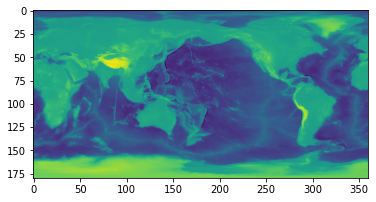

In [2]:
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
plt.show()

In [3]:
H.shape

(180, 360)

In [4]:
#including N/S/E/W
#for i in range(180):
 #   for j in range(360):
  #      if i<=90 and j<=180:
   #         print('Latitude:',90-i,'N,','Longitude:',j,'E,','Elevation:',H[i,j],'m')
    #    elif i<=90 and j>180:
     #       print('Latitude:',90-i,'N,','Longitude:',360-j,'W,','Elevation:',H[i,j],'m')
      #  elif i>90 and j<=180:
       #     print('Latitude:',i-90,'S,','Longitude:',j,'E,','Elevation:',H[i,j],'m')
        #elif i>90 and j>180:
         #   print('Latitude:',i-90,'S,','Longitude:',360-j,'W,','Elevation:',H[i,j],'m')

In [5]:
ny=H.shape[0]
nx=H.shape[1]
R=6371000

patches=np.array([])
for ix in range(nx):
    for iy in range(ny):
        lat=90-iy
        long=ix
        phi=90-lat
        dx=2*np.pi*R*np.sin(np.radians(phi))/nx
        dy=np.pi*R/ny
        
        patch=dx*dy
        patches=np.append(patches,patch)

In [6]:
A_estimate = np.sum(patches)
A_true = 4*np.pi*(R**2)

print('Surface patch estimate:',A_estimate,'Forumla:',A_true)
#areas are in meters squared

Surface patch estimate: 510051523967105.4 Forumla: 510064471909788.25


In [7]:
patches_ocean=np.array([])
for ix in range(nx):
    for iy in range(ny):
        if H[iy,ix] <0:
            lat=90-iy
            long=ix
            phi=90-lat
            dx=2*np.pi*R*np.sin(np.radians(phi))/nx
            dy=np.pi*R/ny
        
            patch_ocean=dx*dy
            patches_ocean=np.append(patches_ocean,patch_ocean)
        else:
            pass

In [8]:
A_ocean=np.sum(patches_ocean)
A_ocean
#area of the ocean in meters squared

361968247376497.1

In [9]:
print('Percentage of Earths Surface covered by Ocean:',A_ocean/A_estimate*100,'%')

Percentage of Earths Surface covered by Ocean: 70.96699654206728 %


In [13]:
patches_ocean_volume=np.array([])
for ix in range(nx):
    for iy in range(ny):
        if H[iy,ix] <0:
            lat=90-iy
            long=ix
            phi=90-lat
            dx=2*np.pi*R*np.sin(np.radians(phi))/nx
            dy=np.pi*R/ny
        
            patch_ocean_volume=dx*dy*np.abs(H[iy,ix])
            patches_ocean_volume=np.append(patches_ocean_volume,patch_ocean_volume)
        else:
            pass

In [11]:
ocean_volume=np.sum(patches_ocean_volume)
print(ocean_volume)
#volume of the ocean in cubic meters

1.3385383629690079e+18
